creating a model usefull for predicting water potability using deep learning(Artificial Neural Network)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [2]:
#loading the dataset
df=pd.read_csv('C:\\Users\sojore\Documents\water-potability\water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.shape

(3276, 10)

In [4]:
#exploring the dataset
df.groupby('ph')['ph'].agg('count').head()

ph
0.000000    1
0.227499    1
0.975578    1
0.989912    1
1.431782    1
Name: ph, dtype: int64

In [5]:
df.ph.unique()

array([       nan, 3.71608008, 8.09912419, ..., 9.41951032, 5.12676292,
       7.87467136])

In [6]:
#handlimg missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
#replacing the missing values with mean,mode or median of the data
df.ph.mean()

7.080794504276821

In [8]:
df.ph=df.ph.fillna(df.ph.mean())

In [9]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [10]:
df.Sulfate.median()

333.073545745888

In [11]:
df.Sulfate=df.Sulfate.fillna(df.Sulfate.median())
df.Sulfate.isna().any()

False

In [12]:
df.Trihalomethanes.mean()

66.39629294676803

In [13]:
df.Trihalomethanes=df.Trihalomethanes.fillna(df.Trihalomethanes.mean())
df.Trihalomethanes.isna().sum()

0

In [14]:
df.isnull().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [15]:
#no more missing values
#checking the dataset dtypes
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Text(0, 0.5, 'count')

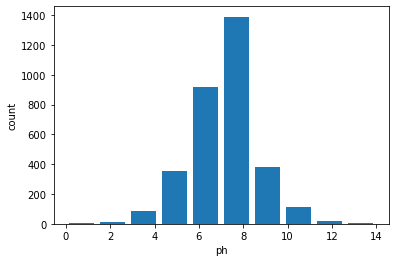

In [17]:
#ploting some charts
plt.hist(df.ph,rwidth=0.8)
plt.xlabel('ph')
plt.ylabel('count')

In [18]:
##we gonna be handling the outliers so that we attain a normal distribution as above

In [19]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

Text(0, 0.5, 'count')

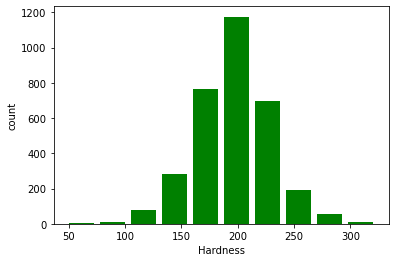

In [20]:
plt.hist(df.Hardness,rwidth=0.8,color='green')
plt.xlabel('Hardness')
plt.ylabel('count')

Text(0, 0.5, 'count')

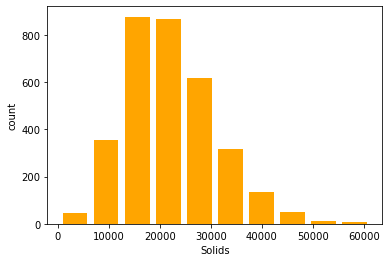

In [21]:
plt.hist(df.Solids,rwidth=0.8,color='orange')
plt.xlabel('Solids')
plt.ylabel('count')

Text(0, 0.5, 'count')

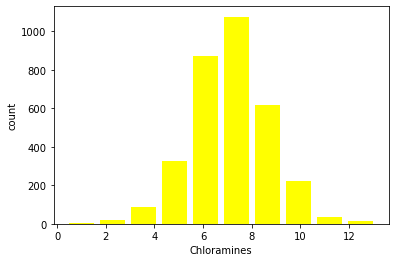

In [22]:
plt.hist(df.Chloramines,rwidth=0.8,color='yellow')
plt.xlabel('Chloramines')
plt.ylabel('count')

Text(0, 0.5, 'count')

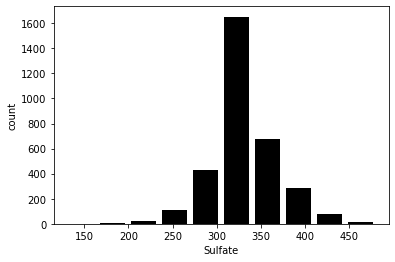

In [23]:
plt.hist(df.Sulfate,rwidth=0.8,color='black')
plt.xlabel('Sulfate')
plt.ylabel('count')

Text(0, 0.5, 'count')

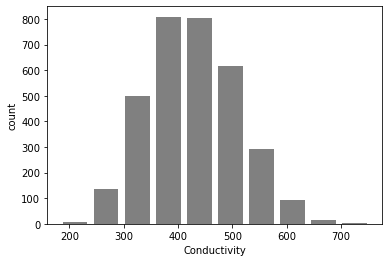

In [24]:
plt.hist(df.Conductivity,rwidth=0.8,color='grey')
plt.xlabel('Conductivity')
plt.ylabel('count')

Text(0, 0.5, 'count')

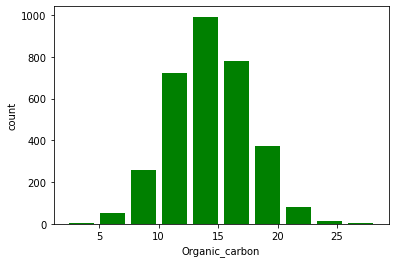

In [25]:
plt.hist(df.Organic_carbon,rwidth=0.8,color='green')
plt.xlabel('Organic_carbon')
plt.ylabel('count')

Text(0, 0.5, 'count')

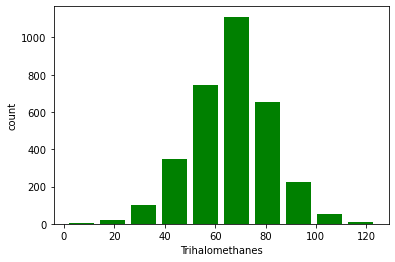

In [26]:
plt.hist(df.Trihalomethanes,rwidth=0.8,color='green')
plt.xlabel('Trihalomethanes')
plt.ylabel('count')

Text(0, 0.5, 'count')

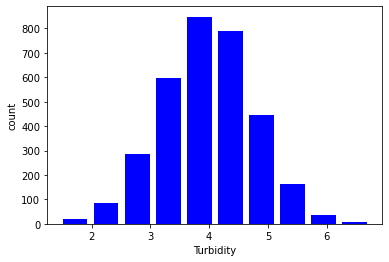

In [27]:
plt.hist(df.Turbidity,rwidth=0.8,color='blue')
plt.xlabel('Turbidity')
plt.ylabel('count')

In [28]:
#my data seems to be having a normal distribution which is pretty cool,now we gonna try filter some outliers using the 
#quantile function

In [29]:
df1=df.copy()
df1.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1942,6.504113,171.722555,20852.764496,7.704990,282.105545,359.460950,13.475273,83.622260,5.396623,1
1724,7.595229,188.373282,32869.474408,6.745588,365.208692,326.627131,13.883329,73.438220,3.497604,0
2282,10.524602,256.172323,31965.364041,5.007003,288.565983,505.361417,12.536626,75.343364,4.340987,0
1858,7.080795,115.392979,46077.358485,5.289307,437.592300,422.017356,10.809632,53.617035,4.212511,0
723,10.137932,242.005716,15088.827653,8.677789,333.073546,596.346346,14.971199,62.365824,3.872018,1


In [30]:
ll1=df1.ph.quantile(0.001)
ul1=df1.ph.quantile(0.999)
ll1,ul1

(1.1114262818916294, 12.920071468912216)

In [31]:
df1[(df1.ph<ll1) | (df1.ph>ul1)]
df2=df1[(df1.ph>=ll1) & (df1.ph<=ul1)]
df2.shape

(3268, 10)

In [32]:
ll2=df2.Hardness.quantile(0.001)
ul2=df2.Hardness.quantile(0.999)
ll2,ul2

(94.28387795829323, 308.10756798012073)

In [33]:
df2[(df2.Hardness<ll2) | (df2.Hardness>ul2)]
df3=df2[(df2.Hardness>=ll2) & (df2.Hardness<=ul2)]
df3.shape

(3260, 10)

In [34]:
ll3=df3.Solids.quantile(0.001)
ul3=df3.Solids.quantile(0.999)
ll3,ul3

(1357.1346517750612, 56343.41668866223)

In [35]:
df3[(df3.Solids<ll3) | (df3.Solids>ul3)]
df4=df3[(df3.Solids>=ll3) & (df3.Solids<=ul3)]
df4.shape

(3252, 10)

In [36]:
ll4=df4.Chloramines.quantile(0.001)
ul4=df4.Chloramines.quantile(0.999)
ll4,ul4

(1.7432985767280988, 12.646719988871938)

In [37]:
df4[(df4.Chloramines<ll4) | (df4.Chloramines>ul4)]
df5=df4[(df4.Chloramines>=ll4) & (df4.Chloramines<=ul4)]
df5.shape

(3244, 10)

In [38]:
ll5=df5.Sulfate.quantile(0.001)
ul5=df5.Sulfate.quantile(0.999)
ll5,ul5

(204.04972925101737, 461.8989985508091)

In [39]:
df5[(df5.Sulfate<ll5) | (df5.Sulfate>ul5)]
df6=df5[(df5.Sulfate>=ll5) & (df5.Sulfate<=ul5)]
df6.shape

(3236, 10)

In [40]:
ll6=df6.Conductivity.quantile(0.001)
ul6=df6.Conductivity.quantile(0.999)
ll6,ul6

(220.94332377369548, 674.0001538692661)

In [41]:
df6[(df6.Conductivity<ll6) | (df6.Conductivity>ul6)]
df7=df6[(df6.Conductivity>=ll6) & (df6.Conductivity<=ul6)]
df7.shape

(3228, 10)

In [42]:
ll7=df7.Organic_carbon.quantile(0.001)
ul7=df7.Organic_carbon.quantile(0.999)
ll7,ul7

(4.5612906701182085, 23.94453967327361)

In [43]:
df7[(df7.Organic_carbon<ll7) | (df7.Organic_carbon>ul7)]
df8=df7[(df7.Organic_carbon>=ll7) & (df7.Organic_carbon<=ul7)]
df8.shape

(3220, 10)

In [44]:
ll8=df8.Trihalomethanes.quantile(0.001)
ul8=df8.Trihalomethanes.quantile(0.999)
ll8,ul8

(14.636997108633313, 115.73392547167587)

In [45]:
df8[(df8.Trihalomethanes<ll8) | (df8.Trihalomethanes>ul8)]
df9=df8[(df8.Trihalomethanes>=ll8) & (df8.Trihalomethanes<=ul8)]
df9.shape

(3212, 10)

In [46]:
ll9=df9.Turbidity.quantile(0.001)
ul9=df9.Turbidity.quantile(0.999)
ll9,ul9

(1.6453730128575634, 6.382467564005948)

In [47]:
df9[(df9.Turbidity<ll9) | (df9.Turbidity>ul9)]
df10=df9[(df9.Turbidity>=ll9) & (df9.Turbidity<=ul9)]
df10.shape

(3204, 10)

In [48]:
df10.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
374,8.882684,135.523062,4857.253807,5.209779,333.073546,532.336659,20.296274,20.337753,3.827921,1
1444,6.848033,165.815326,6068.454885,6.132132,373.206834,442.786267,11.118171,64.027600,4.257038,0
1079,6.744799,204.084318,20215.697517,6.125252,304.527937,544.339317,12.014243,72.608076,4.868543,1
953,6.583065,163.361604,17977.693938,6.542088,333.073546,383.124504,18.094544,44.136469,3.772859,0
2545,7.080795,199.942222,25973.326631,6.490994,336.040741,344.970363,12.640414,46.854524,3.151768,0


Text(0, 0.5, 'count')

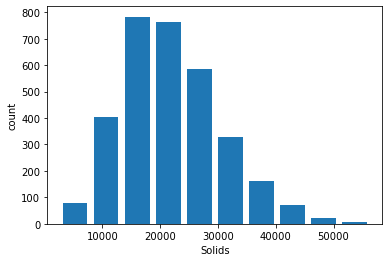

In [49]:
plt.hist(df10.Solids,rwidth=0.8)
plt.xlabel('Solids')
plt.ylabel('count')

In [50]:
X=df10.drop('Potability',axis='columns')
X.shape

(3204, 9)

In [51]:
y=df10.Potability
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [52]:
#my data looks pretty cool,so we can prepare the training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [53]:
X_train.shape

(2563, 9)

In [54]:
len(X_test)

641

In [55]:
#using ANN to create a prediction model for water potability

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [57]:
model=keras.Sequential([
    keras.layers.Dense(9,input_dim=9,activation='relu'),
    keras.layers.Dropout(0.5),#this layer will drop 50% of the neurons-----the good practice is we put dropout layer after each
    #hidden layer
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
321/321 [==============================] - 10s 4ms/step - loss: 559.2151 - accuracy: 0.5400
Epoch 2/100
321/321 [==============================] - 2s 5ms/step - loss: 119.8976 - accuracy: 0.5868
Epoch 3/100
321/321 [==============================] - 1s 5ms/step - loss: 44.4378 - accuracy: 0.5934A: 0s - loss: 48.2744 
Epoch 4/100
321/321 [==============================] - 2s 5ms/step - loss: 12.3834 - accuracy: 0.5989
Epoch 5/100
321/321 [==============================] - 2s 6ms/step - loss: 10.2208 - accuracy: 0.5895A: 0s - loss: 10.1132 - accu
Epoch 6/100
321/321 [==============================] - 2s 6ms/step - loss: 5.2654 - accuracy: 0.5903
Epoch 7/100
321/321 [==============================] - 2s 7ms/step - loss: 1.9218 - accuracy: 0.5985
Epoch 8/100
321/321 [==============================] - 2s 7ms/step - loss: 2.0765 - accuracy: 0.5981
Epoch 9/100
321/321 [==============================] - 2s 5ms/step - loss: 1.1646 - accuracy: 0.5966
Epoch 10/100
321/321 [===========

321/321 [==============================] - 2s 7ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 78/100
321/321 [==============================] - 2s 7ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 79/100
321/321 [==============================] - 2s 6ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 80/100
321/321 [==============================] - 2s 5ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 81/100
321/321 [==============================] - 2s 7ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 82/100
321/321 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.6145
Epoch 83/100
321/321 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 0.6145
Epoch 84/100
321/321 [==============================] - 2s 5ms/step - loss: 0.6667 - accuracy: 0.6145
Epoch 85/100
321/321 [==============================] - 2s 5ms/step - loss: 0.6668 - accuracy: 0.6145
Epoch 86/100
321/321 [==============================] - 1s 4ms/step - loss: 0.6667 - accuracy: 

In [58]:
#testing my model on the test dataset
model.evaluate(X_test,y_test)

21/21 [==============================] - 1s 6ms/step - loss: 0.6666 - accuracy: 0.6147


[0.6666163206100464, 0.614664614200592]

In [59]:
#my model is kinda doing pretty okay,so i can do prediction

In [60]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [61]:
y_test[:10]

1005    0
906     0
176     0
2708    0
3053    0
1968    1
1929    1
3203    1
1263    0
2900    0
Name: Potability, dtype: int64

In [62]:
y_pred=model.predict(X_test).reshape(-1)
y_pred=np.round(y_pred)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       394
           1       0.00      0.00      0.00       247

    accuracy                           0.61       641
   macro avg       0.31      0.50      0.38       641
weighted avg       0.38      0.61      0.47       641



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
##using machine learning algorithms to build a model,
#i will compare its perfomance to the ANN model

In [64]:
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [65]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [67]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,-0.007070,{'normalize': True}
1,lasso,-0.001559,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,-0.739868,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,svm,0.593372,"{'C': 1, 'kernel': 'rbf'}"
4,random_forest,0.650682,{}
5,logistic_regression,0.593372,{}


In [68]:
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
y_prediction=model1.predict(X_test)
y_prediction[:10]

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [70]:
y_test[:10]

1005    0
906     0
176     0
2708    0
3053    0
1968    1
1929    1
3203    1
1263    0
2900    0
Name: Potability, dtype: int64

Text(159.0, 0.5, 'Truth')

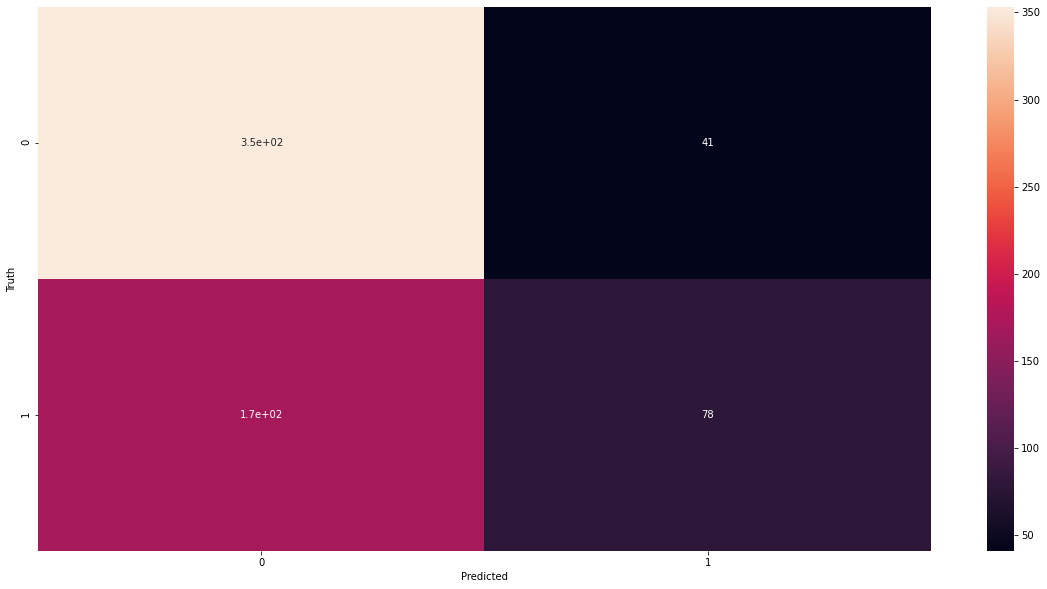

In [72]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_prediction)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [74]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_prediction))

Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.90      0.77       394
           1       0.66      0.32      0.43       247

    accuracy                           0.67       641
   macro avg       0.67      0.61      0.60       641
weighted avg       0.67      0.67      0.64       641

